In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

import statsmodels.formula.api as smf

In [4]:
delivery_time_data = pd.read_csv("C:/Users/DELL/Downloads/assignment/simple linear regression/delivery_time.csv")

In [5]:
delivery_time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
delivery_time_data.shape

(21, 2)

In [7]:
delivery_time_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
delivery_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
delivery_time_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [14]:
delivery_time_data= delivery_time_data.rename({"Delivery Time": "Delivery_Time", "Sorting Time": "Sorting_Time"}, axis =1)

In [16]:
delivery_time_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
delivery_time_data[delivery_time_data.duplicated()].shape

(0, 2)

In [24]:
delivery_time_data[delivery_time_data.duplicated()]

,Delivery_Time,Sorting_Time


Text(0.5, 1.0, 'Sorting_Time')

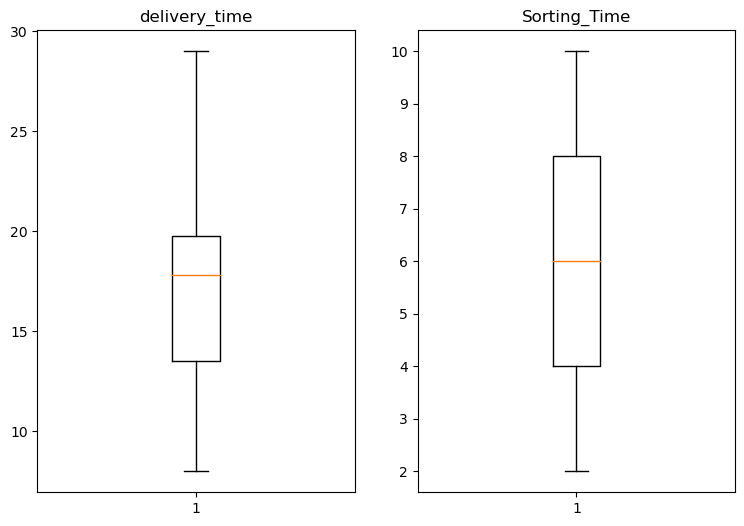

In [39]:
#Plotting the data for outlayers 
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(delivery_time_data["Delivery_Time"])
plt.title("delivery_time")
plt.subplot(122)
plt.boxplot(delivery_time_data["Sorting_Time"])
plt.title("Sorting_Time")

In [42]:
delivery_time_data.corr()

# as the score is more than 0.8 so good corelation between two varibale lets check visualization 

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

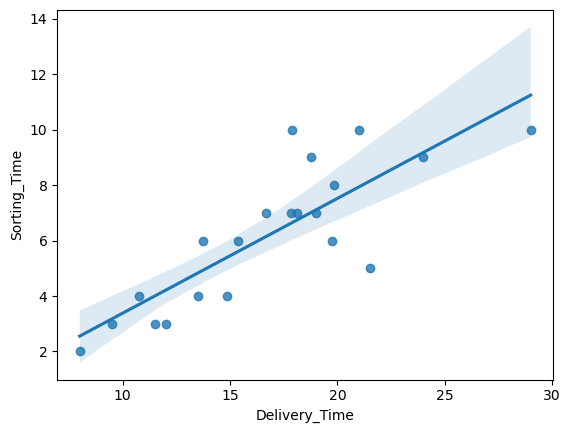

In [49]:
#regression plot 
sns.regplot(x =delivery_time_data['Delivery_Time'], y = delivery_time_data["Sorting_Time"])

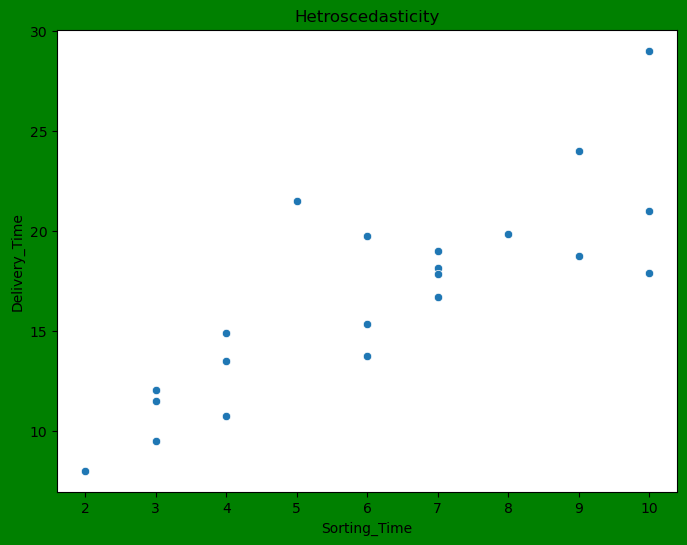

In [59]:
#Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6) ,facecolor = 'green')
sns.scatterplot (x = delivery_time_data['Sorting_Time'], y= delivery_time_data['Delivery_Time'])
plt.title('Hetroscedasticity',fontweight= 'light', fontsize = 12)
plt.show()

In [57]:
delivery_time_data.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

In [ ]:
#data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.
#Sorting Time Increases Delivery Time also increases with much variation along the way

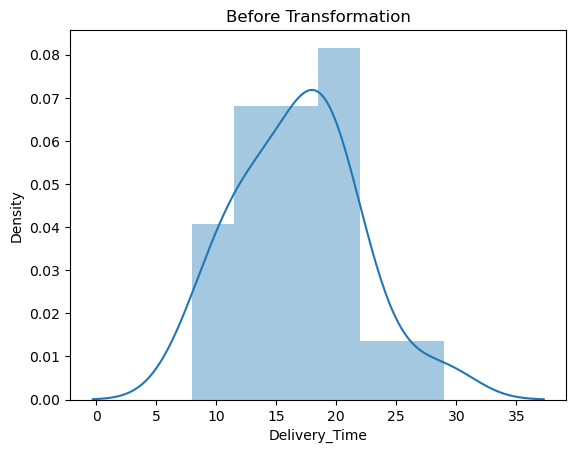

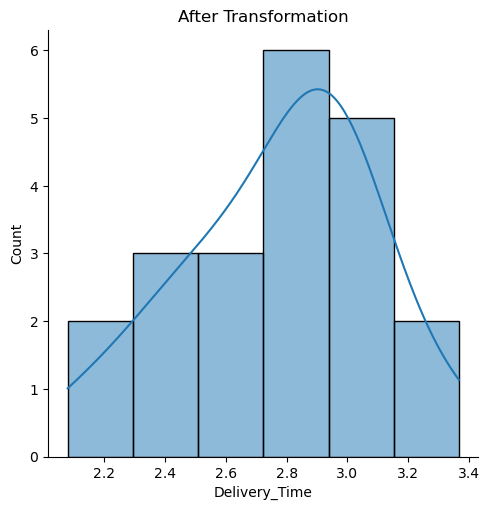

In [71]:
sns.distplot(delivery_time_data['Delivery_Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery_time_data['Delivery_Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

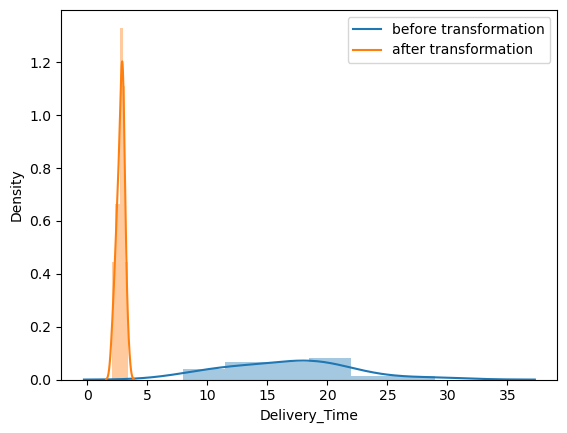

In [110]:
labels = ['before transformation', 'after transformation']
sns.distplot(delivery_time_data['Delivery_Time'], bins =6, kde = True)
sns.distplot(np.log(delivery_time_data['Delivery_Time']), bins =6, kde = True)
plt.legend(labels)
plt.show()


#How log transformation affects the data and it scales the values down
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

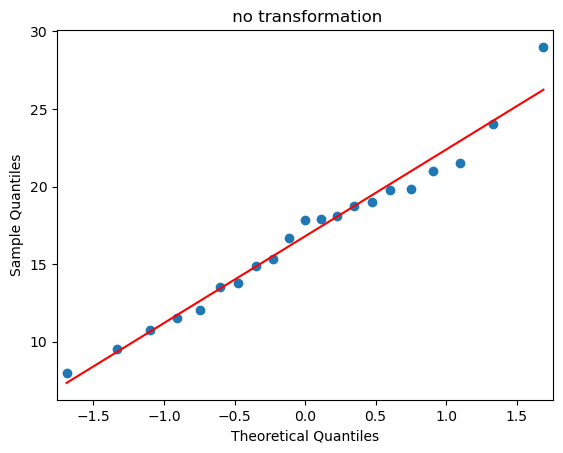

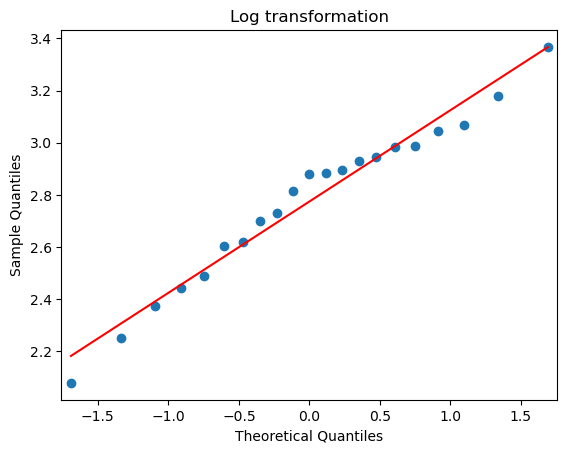

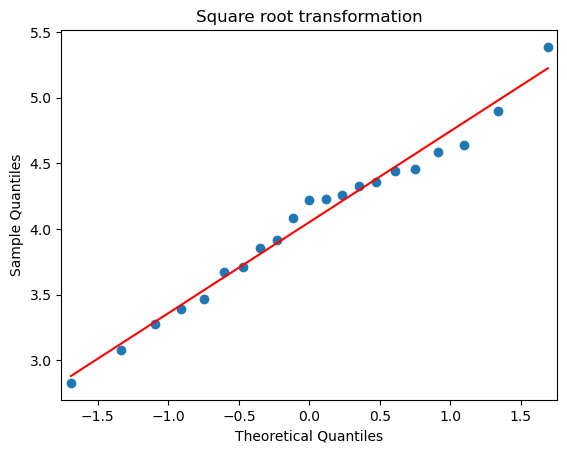

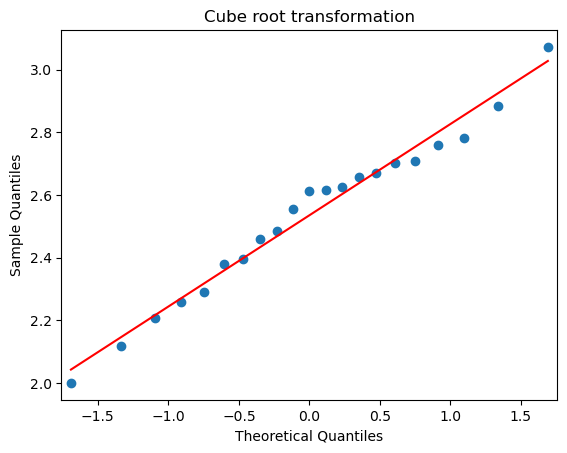

In [80]:
smf.qqplot(delivery_time_data['Delivery_Time'], line = 'r')
plt.title(' no transformation')
smf.qqplot(np.log(delivery_time_data['Delivery_Time']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(delivery_time_data['Delivery_Time']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(delivery_time_data['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')

plt.show()


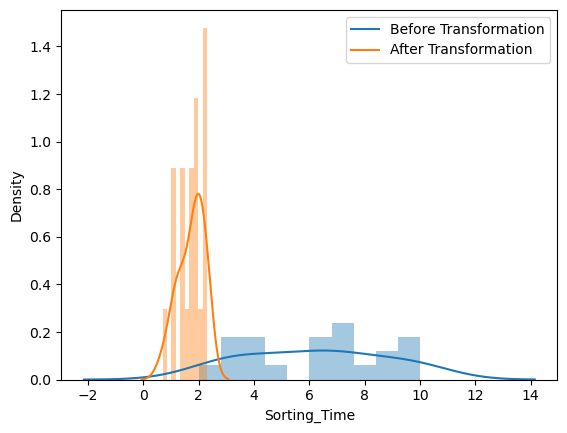

In [82]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery_time_data['Sorting_Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery_time_data['Sorting_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

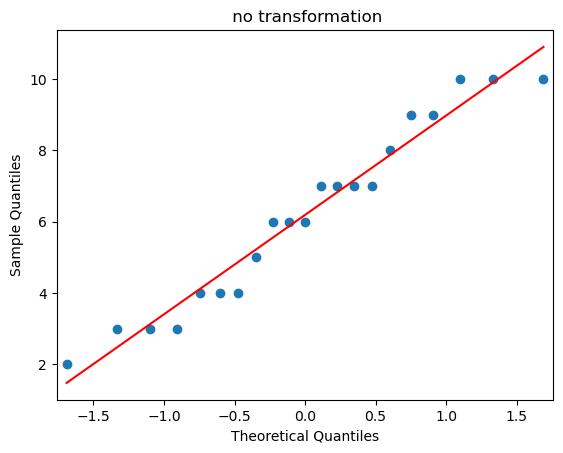

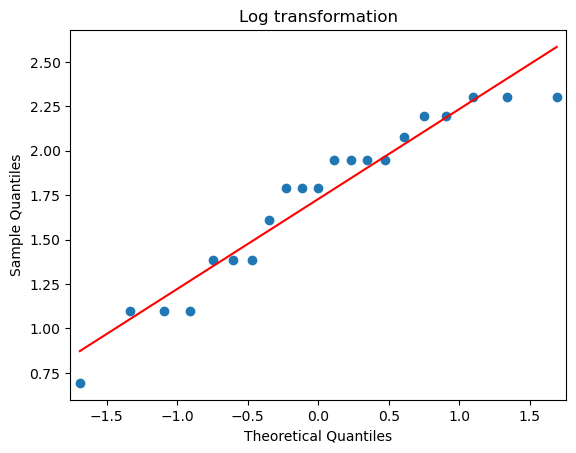

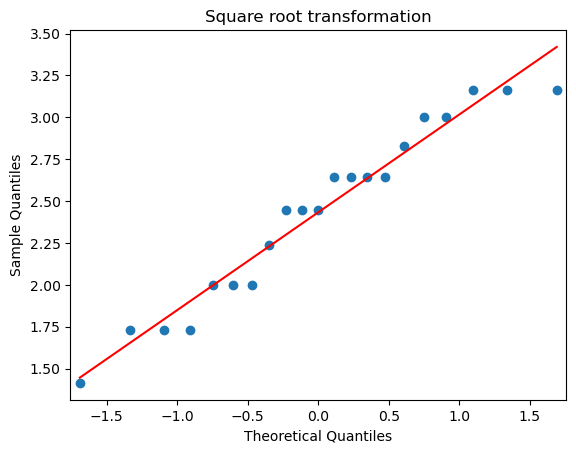

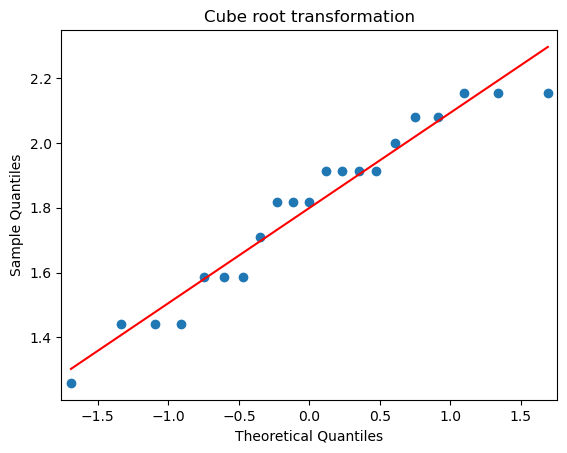

In [84]:
smf.qqplot(delivery_time_data['Sorting_Time'], line = 'r')
plt.title(' no transformation')
smf.qqplot(np.log(delivery_time_data['Sorting_Time']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(delivery_time_data['Sorting_Time']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(delivery_time_data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')

plt.show()


In [ ]:
#We only Perform any data transformation when the data is skewed or not normal

In [89]:
model = smf.ols(formula = 'Delivery_Time~Sorting_Time', data = delivery_time_data).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        18:01:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are still below 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
Lets Try some data transformation to check whether these scores can get any higher than this.

In [91]:

#Square Root transformation on data

square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = delivery_time_data).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 18 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                            12:45:22   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
Lets Try other data transformation to check whether these scores can get any higher than this.

In [92]:
# cube Root transformation on data


cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = delivery_time_data).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 18 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                            12:50:42   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
Lets Try other data transformation to check whether these scores can get any higher than this.

Log transformation on Data

In [93]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = delivery_time_data).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 18 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           12:51:58   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence, we can stop here

In [ ]:
Model Testing
Y = Beta0 + Beta1*(X)
Finding Coefficient Parameters (Beta0 and Beta1 values)

In [94]:
model.params


Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Here, 
(Intercept) Beta0 value = 6.58 
& 
(Sorting Time) Beta1 value = 1.64
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e 

if (P_value < α=0.05 ; Reject Null)¶

Null Hypothesis as Beta1=0 (No Slope)

and 

Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [95]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82,

pvalue=0.001147¶


(daily) Beta1: tvalue=6.38, pvalue=0.000004

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [96]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%¶

#Residual Analysis
Test for Normality of Residuals (Q-Q Plot)



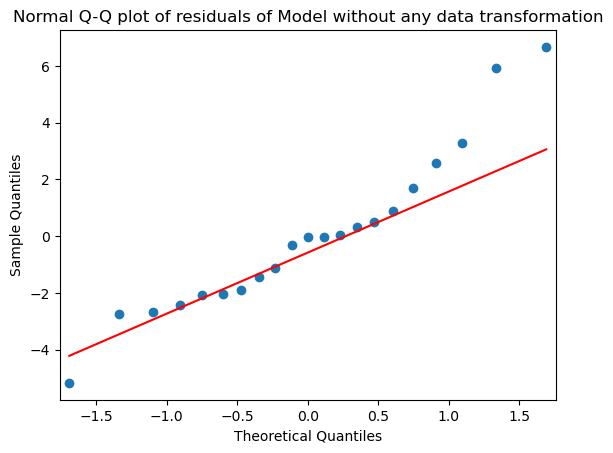

In [97]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

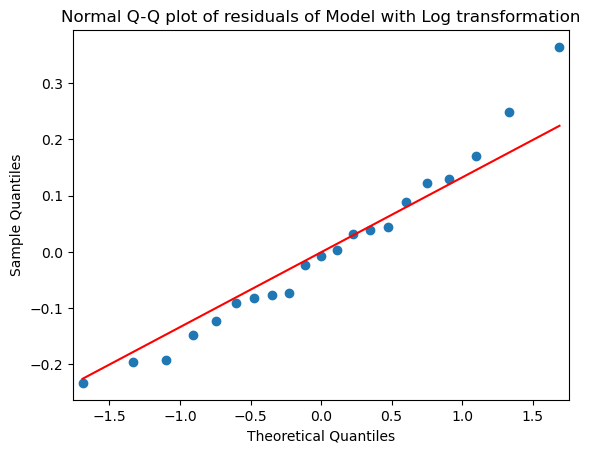

In [98]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

As you can notice in the above plots


Both The Model have Homoscedasciticity.
The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

### Model Validation
 

Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [101]:
from sklearn.metrics import mean_squared_error

In [104]:
square_root_pred_y =np.square(square_root_model.predict(delivery_time_data['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(delivery_time_data['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(delivery_time_data['Sorting_Time']))

In [105]:
square_root_rmse =np.sqrt(mean_squared_error(delivery_time_data['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(delivery_time_data['Delivery_Time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(delivery_time_data['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)

model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893575 
log_model= 2.7458288976145497


In [106]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

As log_model has the minimum RMSE and highest Adjusted R-squared score. 

Hence, we are going to use log_model to predict our values¶

log_model is the model where we did log transformation on both dependent variable as well as on independent variable

Predicting values from Model with Log Transformation on the Data¶

In [107]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = delivery_time_data.Sorting_Time
predicted['Delivery_Time'] = delivery_time_data.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


Predicitng from Original Model without any data transformation

In [109]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = delivery_time_data.Sorting_Time
predicted1['Delivery_Time'] = delivery_time_data.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
